## Definitions and Framing

* **Supervised Machine Learning:** 
    Using known data to generate some useful predictions of on unseen data

    Label $y$: The target variable that we are trying to predict, for example 'spam' or 'not spam'. 

    Features: Something about the data that is used to represent the data, that is later fed into a model. Complicated machine learning models can have multiple features $x_1, x_2, \ldots, x_n$. So this is a vector $\mathbf{x}$.

    Model: Maps unseen data to predictions of label $y$. It is defined by internal parameters that are learned using a training set of labeled data

    Labeled data can be represented as $(\mathbf{x}, y)$. In unlabeled data, $y$ is not known and is predicted by the model. 


* **Models**

    A model defines the relationship between the features and the label. There are two key phases in the life of a model: <br>

    Training: The phase where you the model is trained or learned. You show the model a number of examples of labeled data, and allow the model to learn the relationship between the features and the label. In other words, it is learning the values of the parameters in the model. These parameters in the model are often called hyperparameters. 

    Inference: The phase where the model is used to generate labels $y'$ given features $\mathbf{x}$. 
    
    
* **Regression vs. Classification**

    A regression predicts continuous values while a classification predicts discrete values. 

## Descending into ML

Topics covered: Linear Regression, Training and Loss

* The $L_2$ loss is defined as 

$$
\begin{align}
L_2 \textrm{ Loss } = \sum\limits_i (y_i - prediction_i(\mathbf{x}))^2 
\end{align}
$$

where we sum over all data points in the training set $i$. 

* The convention in machine learning is to represent the linear model as $y' = w_1 x_1 + b$ instead of the more traditional $y = mx + b$. We could easily generalize this regression from one feature to multiple features and the prediction would be given by $y' = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$, where all the $w_i$'s are weights and all the $x_i$'s are features. The process of fitting the model is called training and the process of using the trained model to make a prediction is called inference. 

* A commonly used loss function is the mean squared error (MSE), but this is neither the only loss function nor the best or most practical loss function for all cases.

## Reducing Loss

* One of the popular ways to find the minimum in the loss function is to use Gradient Descent. We calculate a gradient at each point and move in the direction of decreasing gradient. The step size that we use as we advance in the direction of decreasing gradient is called the learning rate. This has to be chosen carefully: in multi-dimensional problems, too large a learning rate can cause the code to become unstable. 

* We can also get trapped in local minima if the space is *not-convex*. There is a whole sprawling field of non-convex optimization. 

* There are two important flavors of gradient descent:

    **Stochastic Gradient Descent:**

    In theory, while using gradient descent, we need to calculate the gradient of the loss function considering all examples. However in practice, this is found to be excessive and computationally expensive. We therefore select only one example at random and calculate the gradient of the loss function considering only that one example. This is called stochastic gradient descent. Although this might require more steps to reach the optimum, overall there is usually less computation when dealing with very large data sets. Gradient calculations can be very expensive. 

    Mathematically, we want to calculate 

    $$
    \begin{align}
    w_{n+1} = w_n -\eta Q(w)
    \end{align}
    $$

    where $\eta$ is the learning rate and $Q(w) = \frac{1}{N}\sum_i Q_i(w)$ is the $L_2$ loss for the $i$-th example. What we do instead, in stochastic gradient descent is to first randomnly pick a particular example $k$ and calculate the loss function $Q_k(w)$ and then update $w$ using:

    $$
    \begin{align}
    w_{n+1} = w_n -\eta Q_k(w)
    \end{align}
    $$

    and perform this iteratively until the minimum criterion is reached. 

    When there are multiple parameters to optimize, the gradient is of course a vector, and so is $\mathbf{w} = (w_1, w_2, \ldots)$ and we proceed in the direction of steepest gradient in steps $\eta$ large. 

    **Mini-batch Gradient Descent**

    This is very similar to stochastic gradient descent except that instead of taking only one data point, we take batches of 10 or 100 of them.  Especially with datasets that contain duplicates, enormous datasets do not contain any further information than very large datasets. Mini-batch gradient descent exploits this fact and works very well in practice. Typical values of batch-size range between 10 and 1000. Stochastic gradient descent is an extreme example of mini-batch gradient descent with batch size 1.

* The algorithm to train the model in this case is iterative: we start with some intial guesses for the parameters, compute the loss function for those values, update the values of the parameters through some scheme (with the goal of moving in the direction of lower loss), calculate the loss for the updated values of the parameters, and proceed iteratively until we achieve convergence. Convergence is usually assumed when the loss becomes below some threshold value, or if the loss function starts changing extremely slowly. 

## First steps with TensorFlow

* TensnsorFlow is a computational framework that allows you to build machine learning models. We can use both lower level APIs by defining models based on a series of mathematical operations or we could use predefined higher level APIs such as `tf.estimator`. These architectures can be linear regressors or neural networks. 

* TensorFlow consists of the following two components:

    0. A graph protocol buffer
    0. A runtime that executes the distributed graph

* The **graph protocol buffer** or protobuf takes data structures written in a text file and then generates classes in Python (or other language) that allows you to load, save and interact with the data in a user friendly way. In this sense the protobuf and the runtime are akin to Python code and a Python interpreter. 

* Because TensorFlow is built using APIs of various levels of abstraction, we have a choice of level. In general, I should chose the layer that offers the highest level of abstraction. Of course, the highest layers are also less flexible, so for some special modeling cases if I need more flexibility, I can just drop one run lower in the level of API. 

### `tf.estimator` API

The `tf.estimator` API is one of the highest level APIs that has a lot of prepackaged tools of use. Below we show some code to exemplify its use. In the example below, we are going to estimate the median housing pricebased on just one input feature. The data is from the 1990 California housing census data. Available [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description). First we perform some imports:

### Step 0: Setup, imports, loading and inspecting the data

In [2]:
import math
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

We next load the data

In [ ]:
california_housing_dataframe = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe['median_house_value'] /= 1000

In [ ]:
california_housing_dataframe.head()

We are now going to use `total_rooms` as an input feature to predict our target (or label) `median_house_value`.  Note that the data is at the city block level, so the feature represents the total number of rooms in the block. We are going to use the `tf.estimator` API to implement a linear regressor to model the data. The API already implements a lot of the low-level nuts and bolts of the regression (or in general, other models) so we can focus on the training, evaluating, and visualizing aspects of the process. The specific class we will use is the `tf.estimator.LinearRegressor` class. 

### Step 1: Defining the features 

There are two main classes of features: 

* **categorical:** a feature that can take on discrete values, like spam/not spam, sunny/rainy/cloudy, etc.

* **neumerical:** a feature that can take on continuous or a large number of discrete values, like price, temperature, etc. It seems that these are features that we can do arithmetic on. 

In TensorFlow, we need to define what kind of feature we are working with. In our case, because we are working with `total_rooms` in this example, it is a numerical feature. This identification of the type of feature is done using `tf.feature_column` module, which has various functions built into it. See [here](https://www.tensorflow.org/guide/feature_columns) for documentation. Feature columns only contain a description of the data and not the data itself

In [ ]:
my_feature = california_housing_dataframe[['total_rooms']]
feature_columns = tf.feature_column.numeric_column('total_rooms')

### Step 2: Defining the target

We want to predict the meadian house value given the number of rooms, so this is our target

In [ ]:
targets = california_housing_dataframe['median_house_value']

### Step 3: Configure the LinearRegressor

We now configure a linear regression model using `LinearRegressor`. The optimization itself is carried out using a built-in implementation of mini-batch stochastic gradient descent. We also use the `tf.contrib.estimator.clip_gradients_by_norm` functions to impose a cut off on the step size so that the gradient descent doesn't become unstable. 

In [ ]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimzer, 5.0)

[ 1  4  9 16 25]


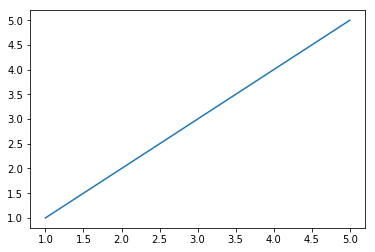

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array([1, 2, 3, 4, 5])
b = a.copy()
print(a*b)
plt.plot(a, b)